In [ ]:
%matplotlib inline
from keras import layers, models
from keras import datasets
from keras.utils import np_utils
from keraspp.skeras import plot_loss, plot_acc

In [2]:
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Pd_l, Nout):
        super().__init__()
        self.add(layers.Dense(Nh_l[0], activation='relu', input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dropout(Pd_l[0]))
        self.add(layers.Dense(Nh_l[1], activation='relu', name='Hidden-2'))
        self.add(layers.Dropout(Pd_l[1]))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [3]:
def Data_func():
    (X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()
    
    Y_train = np_utils.to_categorical(Y_train)
    Y_test = np_utils.to_categorical(Y_test)
    
    L, W, H, C = X_train.shape
    X_train = X_train.reshape(-1, W*H*C)
    X_test = X_test.reshape(-1, W*H*C)
    
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    return (X_train, Y_train), (X_test, Y_test)

In [ ]:
Nh_l = [100, 50]
Pd_l = [0.0, 0.0]
number_of_class = 10
Nout = number_of_class
(X_train, Y_train), (X_test, Y_test) = Data_func()
model = DNN(X_train.shape[1], Nh_l, Pd_l, Nout)
history = model.fit(X_train, Y_train, epochs=100, batch_size=100, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 14s 342us/step - loss: 1.9492 - accuracy: 0.2973 - val_loss: 1.8332 - val_accuracy: 0.3452
Epoch 2/100
40000/40000 [==============================] - 11s 276us/step - loss: 1.7562 - accuracy: 0.3746 - val_loss: 1.7239 - val_accuracy: 0.3851
Epoch 3/100
40000/40000 [==============================] - 11s 275us/step - loss: 1.6830 - accuracy: 0.4006 - val_loss: 1.6910 - val_accuracy: 0.4020
Epoch 4/100
40000/40000 [==============================] - 12s 292us/step - loss: 1.6480 - accuracy: 0.4100 - val_loss: 1.6647 - val_accuracy: 0.4057
Epoch 5/100
40000/40000 [==============================] - 12s 294us/step - loss: 1.6138 - accuracy: 0.4255 - val_loss: 1.6850 - val_accuracy: 0.4001
Epoch 6/100
40000/40000 [==============================] - 13s 318us/step - loss: 1.5772 - accuracy: 0.4364 - val_loss: 1.5879 - val_accuracy: 0.4340
Epoch 7/100
40000/40000 [=========================

10000/10000 [==============================] - 0s 45us/step
Accuracy: [1.5308968782424928, 0.48459999471902848]


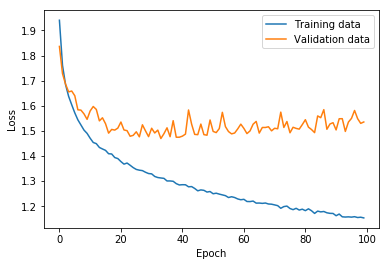

In [12]:
performance_test = model.evaluate(X_test, Y_test, batch_size=100)
print('Accuracy:', performance_test)
plot_loss(history)


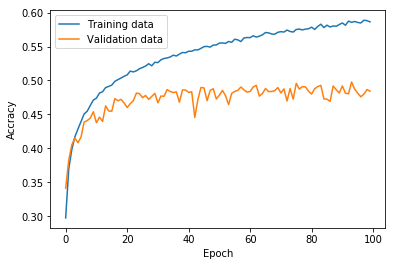

In [13]:
plot_acc(history)

In [14]:
Nh_l = [100, 50]
Pd_l = [0.05, 0.5]
number_of_class = 10
Nout = number_of_class
(X_train, Y_train), (X_test, Y_test) = Data_func()
model = DNN(X_train.shape[1], Nh_l, Pd_l, Nout)
history = model.fit(X_train, Y_train, epochs=100, batch_size=100, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 4s 91us/step - loss: 2.1179 - acc: 0.2067 - val_loss: 1.9266 - val_acc: 0.3057
Epoch 2/100
40000/40000 [==============================] - 3s 83us/step - loss: 1.9589 - acc: 0.2787 - val_loss: 1.8463 - val_acc: 0.3340
Epoch 3/100
40000/40000 [==============================] - 3s 74us/step - loss: 1.8936 - acc: 0.3141 - val_loss: 1.8014 - val_acc: 0.3547
Epoch 4/100
40000/40000 [==============================] - 3s 75us/step - loss: 1.8526 - acc: 0.3279 - val_loss: 1.7862 - val_acc: 0.3607
Epoch 5/100
40000/40000 [==============================] - 3s 74us/step - loss: 1.8337 - acc: 0.3357 - val_loss: 1.7586 - val_acc: 0.3739
Epoch 6/100
40000/40000 [==============================] - 3s 74us/step - loss: 1.8187 - acc: 0.3419 - val_loss: 1.7294 - val_acc: 0.3796
Epoch 7/100
40000/40000 [==============================] - 3s 80us/step - loss: 1.8015 - acc: 0.3455 - val_loss: 1.7290 - 

10000/10000 [==============================] - 0s 35us/step
Accuracy: [1.6073555552959442, 0.42079999983310701]


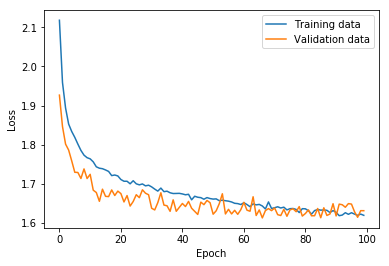

In [15]:
performance_test = model.evaluate(X_test, Y_test, batch_size=100)
print('Accuracy:', performance_test)
plot_loss(history)


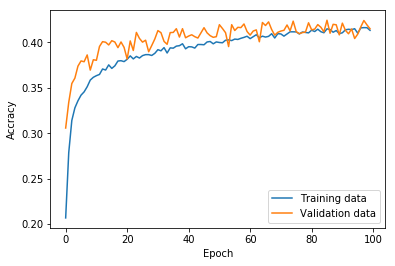

In [16]:
plot_acc(history)